# Zuber Taxi Company Data Analysis - Part 1
# 
### This analysis explores ride data from two datasets:
### 1) Taxi companies and their trip counts on Nov 15-16, 2017.
### 2) Average trip drop-offs by Chicago neighborhoods in November 2017.
#
### Goals:
### - Understand the distribution of rides by company.
### - Identify top neighborhoods for ride drop-offs.
### - Visualize findings to draw insights.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import ttest_ind 

In [2]:
companies_df = pd.read_csv('../data/moved_project_sql_result_01.csv')
print(companies_df.shape)
companies_df.head()


(64, 2)


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [3]:
dropoffs_df = pd.read_csv('../data/moved_project_sql_result_04.csv')
print(dropoffs_df.shape)
dropoffs_df.head()

(94, 2)


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [4]:
companies_df.info()
print("\n")
print('_________________')
dropoffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


_________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


#### Here we loaded all of our data and we can see that it all looks right, there is no missng values and no need to convert anything 

In [5]:
# Find top 10 neighborhoods with highest average drop-offs
# sort neighborhoods by average trips in descending order
top10_neighborhoods = dropoffs_df.sort_values(by='average_trips', ascending=False).head(10)
top10_neighborhoods


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


* The top 10 neiberhoods by average drop offs show areas with high ride activity un chicago during November 2017.
* Loop and River Nort lead the list, which makes sense givinf there downtown locatioon and bussiness activity.

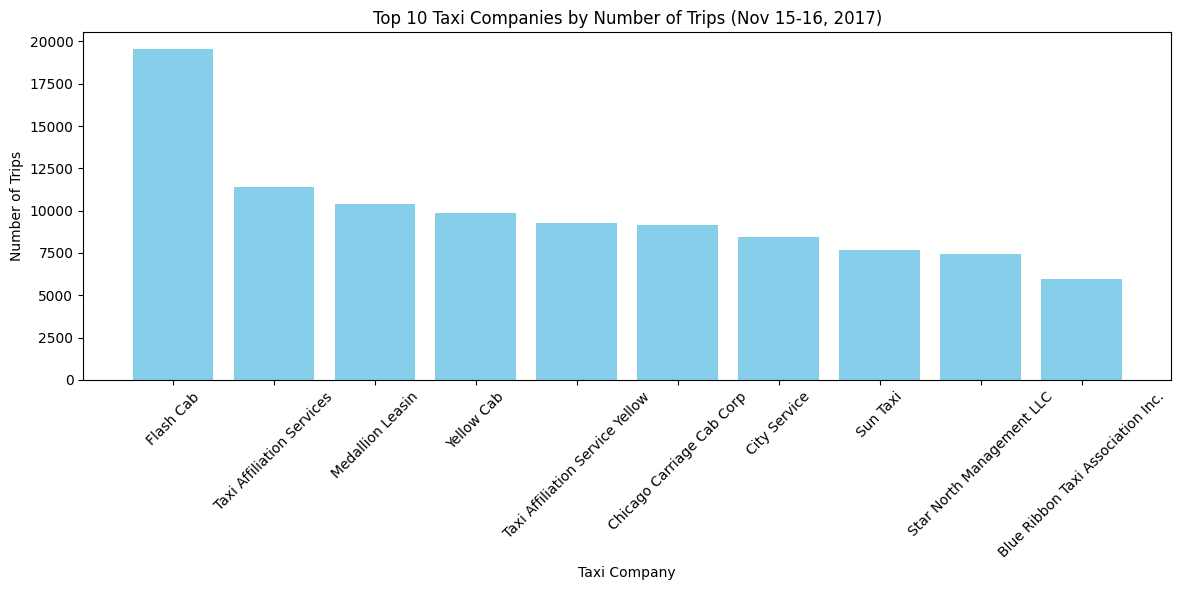

In [6]:
# with a bar chart visualize the top 10 companies by average drop-offs 
top10_companies = companies_df.sort_values(by='trips_amount', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top10_companies['company_name'], top10_companies['trips_amount'], color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Taxi Company')
plt.ylabel('Number of Trips')
plt.title('Top 10 Taxi Companies by Number of Trips (Nov 15-16, 2017)')
plt.tight_layout()
plt.show()

* Flash Cab has the highest number of trips, followed by Taxi Affiliation Services and Medallion Leasing.  
* This suggests these companies dominate ride activity during Nov 15-16, 2017.

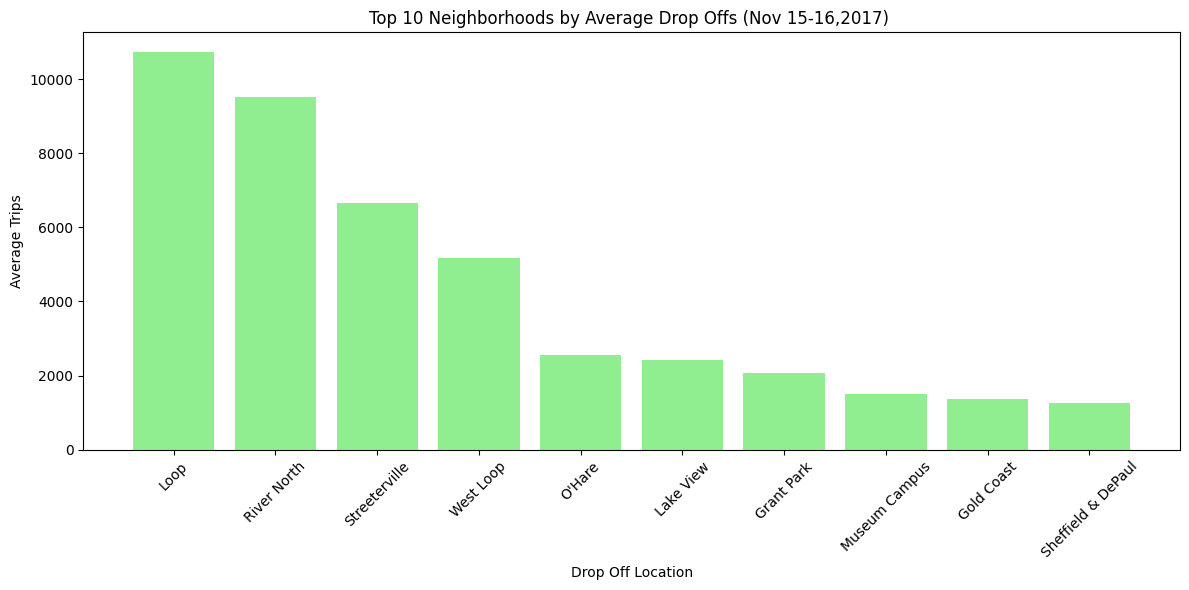

In [7]:
# visualize the top 10 neighborhoods by average drop-offs

plt.figure(figsize=(12, 6))
plt.bar(top10_neighborhoods['dropoff_location_name'], top10_neighborhoods['average_trips'], color='lightgreen')
plt.xticks(rotation=45)
plt.xlabel('Drop Off Location')
plt.ylabel('Average Trips')
plt.title('Top 10 Neighborhoods by Average Drop Offs (Nov 15-16,2017) ')
plt.tight_layout()
plt.show()

* The top 10 neighborhoods are shown in this graph, with Loop having the highest average drop-offs followed by River North.

* This makes sense as both are major commercial and entertainment hubs in Chicago, likely attracting many taxi rides.

In [8]:
# load the third dataset and isnpect it
weather_df = pd.read_csv('../data/moved_project_sql_result_07.csv')
weather_df.info()
print('_______')
weather_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
_______


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


* Now inspected, dataset has no missing values but will beed to convert start_ts to a datetime and convert duration_seconds to a more manageble time amount

In [9]:
# Change start_ts to datetime
weather_df['start_ts'] = pd.to_datetime(weather_df['start_ts'])

In [10]:
# Convert duration_seconds to a more manageable time amount and change column name to duration_minutes
weather_df.rename(columns={'duration_seconds': 'duration_min'}, inplace=True)
weather_df['duration_min'] = weather_df['duration_min'] / 60  # convert seconds to minutes

In [11]:
weather_df.head()

,start_ts,weather_conditions,duration_min
0,2017-11-25 16:00:00,Good,40.166667
1,2017-11-25 14:00:00,Good,32.000000
2,2017-11-25 12:00:00,Good,25.716667
3,2017-11-04 10:00:00,Good,41.866667
4,2017-11-11 07:00:00,Good,24.000000


# Hypothesis test

In [12]:
# filter rides that started on Sturday (dayofweek == 5)
saturday_rides = weather_df[weather_df['start_ts'].dt.dayofweek == 5]

# check how many rides happend on saturday 
print(f"Total rides on saturday: {len(saturday_rides)}")
saturday_rides.head()


Total rides on saturday: 1068


,start_ts,weather_conditions,duration_min
0,2017-11-25 16:00:00,Good,40.166667
1,2017-11-25 14:00:00,Good,32.000000
2,2017-11-25 12:00:00,Good,25.716667
3,2017-11-04 10:00:00,Good,41.866667
4,2017-11-11 07:00:00,Good,24.000000


In [14]:
# split saturdays in 2 categories (rainy and not rainy)
rainy_saturday_rides = saturday_rides[saturday_rides['weather_conditions'] == 'Bad']
non_rainy_saturday_rides = saturday_rides[saturday_rides['weather_conditions'] == 'Good']

# Print the number of rides in each category
print(f"Rainy Saturday rides: {len(rainy_saturday_rides)}")
print(f"Non-rainy Saturday_rides: {len(non_rainy_saturday_rides)}")


Rainy Saturday rides: 180
Non-rainy Saturday_rides: 888


#### we can see that there are 180 saturday rides with "bad" weather and 1068 with good weather  

In [15]:
# Hypothesis test
# set aplha level
alpha = 0.05
 
rainy_duration = rainy_saturday_rides['duration_min']
good_duration = non_rainy_saturday_rides['duration_min']

# Run welch's t-test
t_stat, p_value = ttest_ind(rainy_duration, good_duration, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# interpret the results bases on aplha
if p_value < alpha:
    print(f"P-value < {alpha}: Reject the null hypothesis. Average ride duration differs on rainy Saturdays. ")
else:
    print(f"P-value >= {alpha}: Fail to reject the null hypothesis. No significant difference in average ride duration on rainy Saturdays.")

T-statistic: 7.1860342880686225
P-value: 6.738994326109027e-12
P-value < 0.05: Reject the null hypothesis. Average ride duration differs on rainy Saturdays. 


### The t-test comparing ride durations on rainy versus good weather Saturdays yielded a t-statistic of 7.19 and a p-value < 0.001. Since the p-value is much smaller than the significance level of 0.05, we reject the null hypothesis. This indicates that average ride durations significantly differ on rainy Saturdays compared to good weather Saturdays, suggesting that weather conditions affect travel time from the Loop to O’Hare."